# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np #combien de coups necessaires pour bien arriver

In [2]:
### Simulation du lancé de dé

In [3]:
def Roll():
    return int(np.random.choice (range(1,7),1))

In [4]:
Roll()

5

### Compléter le code et commenter

In [9]:
NA,A,S=0,0,10
temp=Roll()
NA+=1
print(NA,temp,A) #move the dice from his initial position 
while temp!=6: #we move out of the while loop when we get the value 6 of the dice
    NA=NA+1
    temp=Roll()
    print("temp=",temp,"|NA=",NA)
A=1
while A<S:
    temp=Roll()
    NA=NA+1
    print("temp=",temp,"|NA=",NA,"A=",A)
    if A+temp<S:
        A=A+temp
        print("temp=",temp,"|NA=",NA,"A=",A)
    elif A+temp==S:
        A=S
    else:
        print("temp=",temp,"|NA=",NA,"A=",A)
        continue

1 2 0
temp= 2 |NA= 2
temp= 4 |NA= 3
temp= 4 |NA= 4
temp= 3 |NA= 5
temp= 4 |NA= 6
temp= 1 |NA= 7
temp= 5 |NA= 8
temp= 6 |NA= 9
temp= 5 |NA= 10 A= 1
temp= 5 |NA= 10 A= 6
temp= 5 |NA= 11 A= 6
temp= 5 |NA= 11 A= 6
temp= 4 |NA= 12 A= 6


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [17]:
def sim(S):
    A=0
    NA=0
    temp=Roll()
    NA=NA+1
    while (temp !=6) :
        temp=Roll()
        NA+=1
    A=1
    while (A<S) :
        temp=Roll()
        if((temp+A<S)):
            NA+=1
            A+=temp
        elif temp+A>S :
            NA+=1
        else:
            A=S
            NA+=1
    return NA
    #this function helped us to determine the number of tries we need so that we can go out of the prison  with an exact number of steps to reach our destination 

In [33]:
sim(20)

23

In [34]:
# *10000 S=30
L=[sim(30) for i in range (10000)]
Moy=sum(L)/10000
print('estimation de la moyenne de X_30={}'.format(Moy))

estimation de la moyenne de X_30=18.9912


### Simulation de $10^5$  scénario 

In [35]:
X=list(range(10,20))#X is an array of the number of steps,10 is its dimension 
Y=[sum([sim(u) for i in range (10000)])/10000 for u in X] #Y is an array of dimension 10

In [36]:
import matplotlib.pyplot as plt 

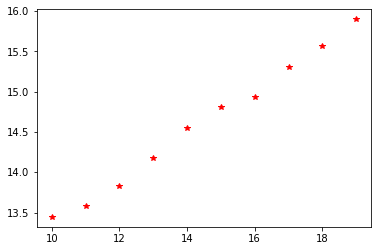

In [37]:
plt.plot(X,Y,'*r')
plt.show()

In [38]:
from scipy import stats
import numpy as np
slope,intercept,r_value,p_value,std_err = stats.linregress(X,Y)

In [39]:
slope

0.2782563636363635

In [40]:
intercept

10.575712727272728

In [41]:
yy=[slope*u+intercept for u in X]

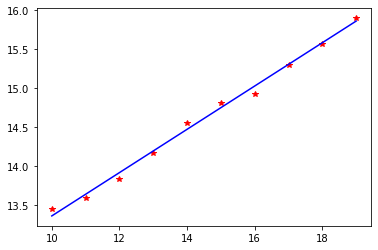

In [42]:
plt.plot(X,Y,'*r',X,yy,'-b')

In [32]:
#droite de la forme y=ax+b , un jeu coder mathemat la simulation pour avoir l'estimation de la moyenne pour essayer de gdegager une formule mathematique pour avoir une relation entre pour n'importe quelle valeur de s on peut savoir le nombre moyen des coups relation entre n,slope and intercept 